In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from matplotlib import rcParams
from IPython.display import Image, display, HTML
%matplotlib inline
from pathlib import Path
dataPath = Path()/'..'/'data'/'uwwork_earlyFeb'

In [2]:
modelList = [('testsuite' + str(number).zfill(3)) for number in range(30)]
directoryList = [dataPath / entry for entry in modelList]

In [3]:
dataList = []
inputList = []
for name in directoryList:
    with (name / 'inputs.txt').open() as json_file:  
    #with open(os.path.join(name, 'inputs.txt')) as json_file:  
        inputList.append(json.load(json_file)['params'])
    data = pd.read_csv((name/'zerodData.csv'))
    goodheader = ''.join(list(data.columns.values))[2:].split(' ')
    data.columns = goodheader
    dataList.append(data)
outputFrame = pd.concat(dataList, keys = modelList)
inputFrame = pd.DataFrame(inputList, index = modelList)

In [14]:
dataList[0].Nu

0         1.000100
1         1.172817
2         1.423147
3         1.758838
4         2.198676
5         2.764788
6         3.480775
7         4.369133
8         5.447071
9         6.714899
10        8.145721
11        9.698766
12       11.316448
13       12.926919
14       14.452867
15       15.819179
16       16.959645
17       17.823528
18       18.377478
19       18.605916
20       18.510418
21       18.108550
22       17.433170
23       16.533916
24       15.479962
25       14.356681
26       13.247053
27       12.208797
28       11.269495
29       10.437982
           ...    
9971     10.259539
9972     10.259539
9973     10.259539
9974     10.259539
9975     10.259539
9976     10.259539
9977     10.259539
9978     10.259539
9979     10.259539
9980     10.259539
9981     10.259539
9982     10.259539
9983     10.259539
9984     10.259539
9985     10.259539
9986     10.259539
9987     10.259539
9988     10.259539
9989     10.259539
9990     10.259539
9991     10.259539
9992     10.

In [4]:
# allDataFrame = pd.concat(
#     dataList,
#     keys = pd.MultiIndex.from_frame(inputFrame),
#     axis = 0,
#     names = list(inputFrame.columns.values)
#     )

In [5]:
indices = inputFrame.loc[inputFrame['Ra'] == 1e5].index

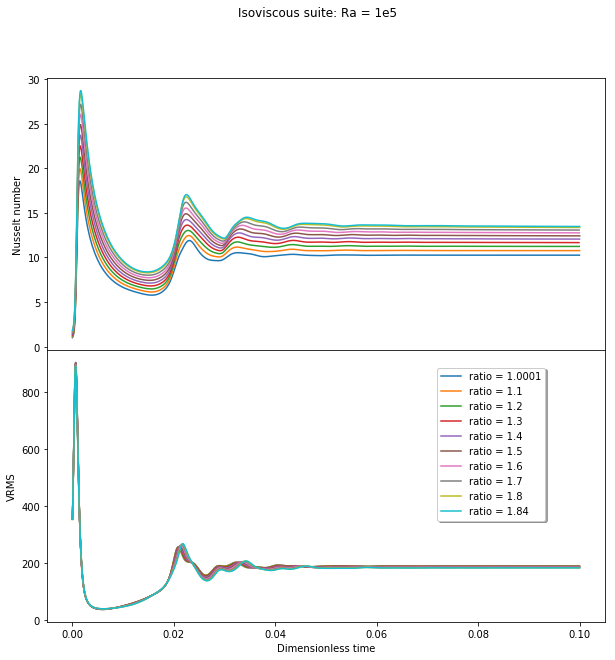

In [6]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (10, 10))

for index in indices:
    frame = outputFrame.loc[outputFrame['modeltime'] < 0.1].loc[index]
    ignoreme = axs[0].plot(frame.modeltime, frame.Nu)
    ignoreme = axs[1].plot(frame.modeltime, frame.VRMS)
axs[0].set_ylabel('Nusselt number')
axs[1].set_ylabel('VRMS')
axs[1].set_xlabel('Dimensionless time')

legendtext = ['ratio = ' + str(val) for val in list(inputFrame.loc[indices].ratio)]
fig.legend(legendtext, loc='center left', bbox_to_anchor=(0.6, 0.3), shadow = True)
fig.subplots_adjust(hspace=0)
fig.suptitle('Isoviscous suite: Ra = 1e5')
fig.show()

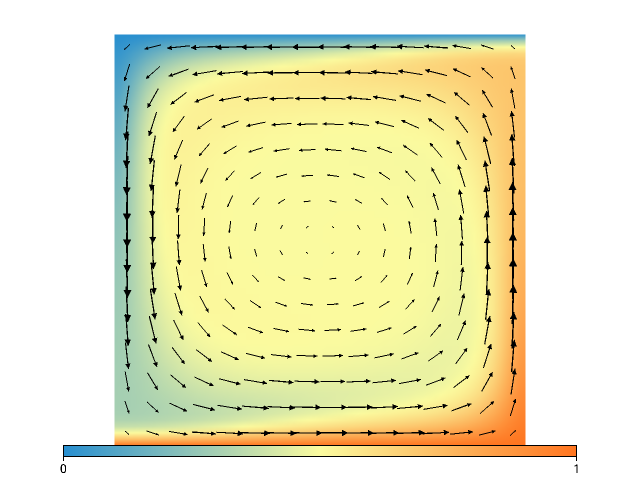

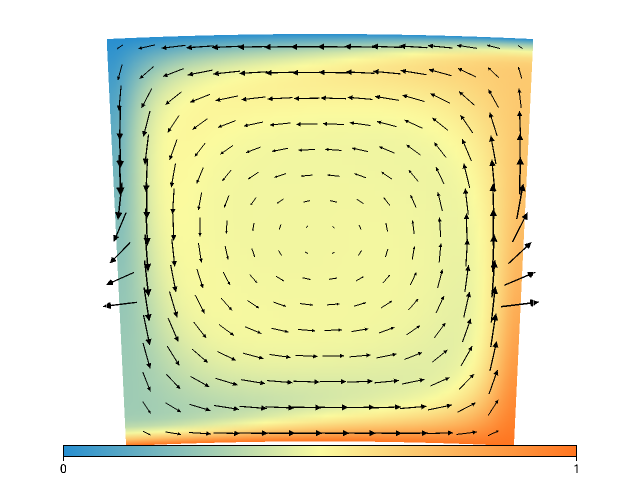

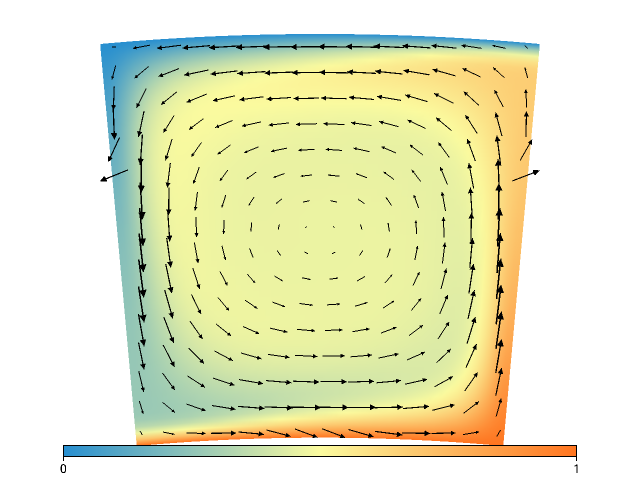

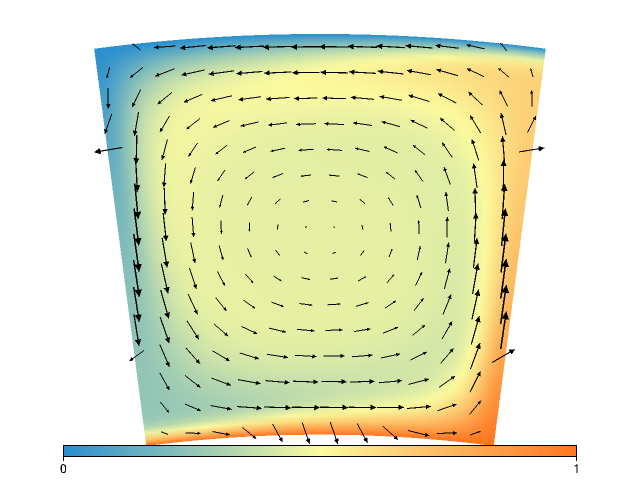

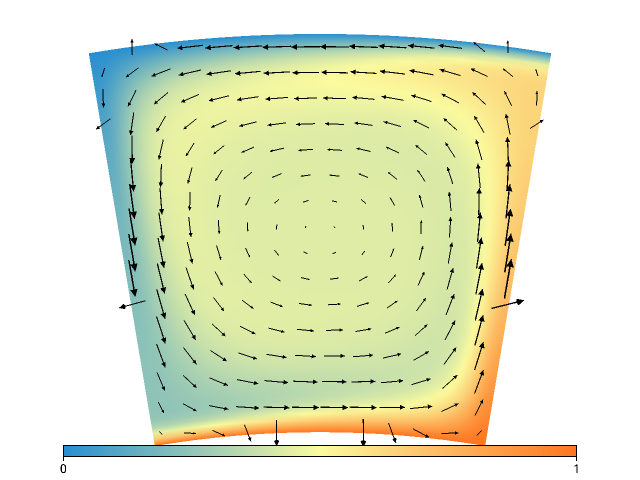

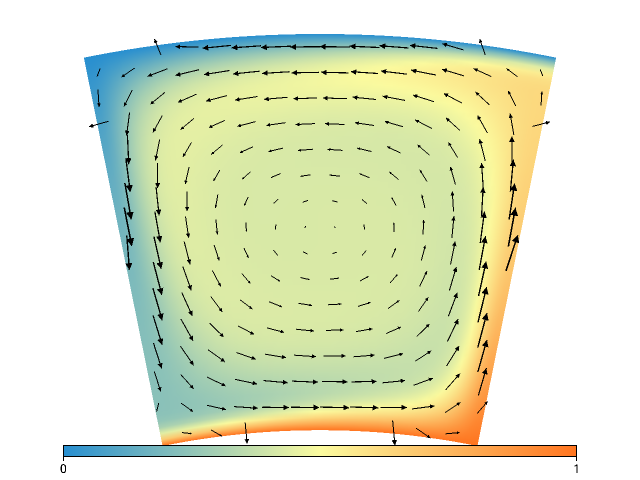

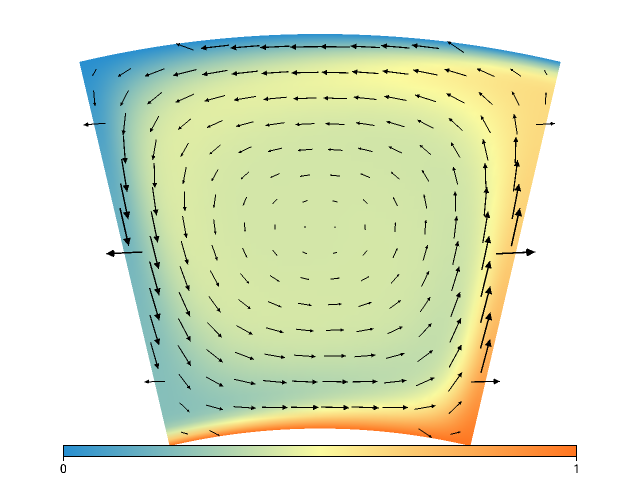

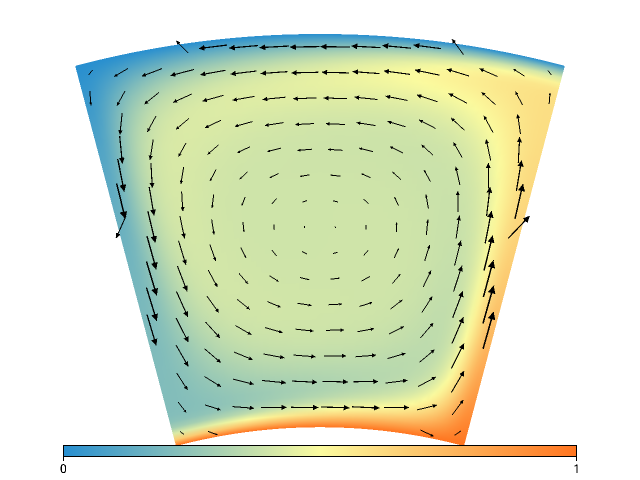

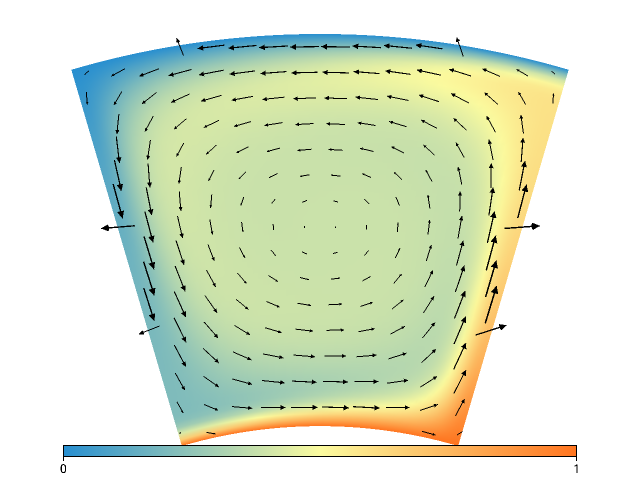

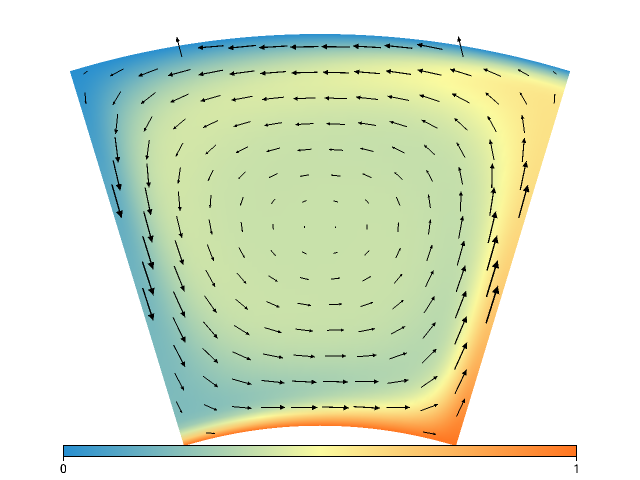

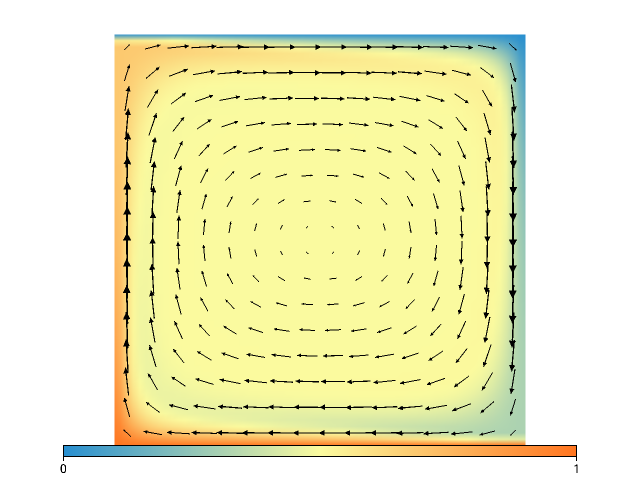

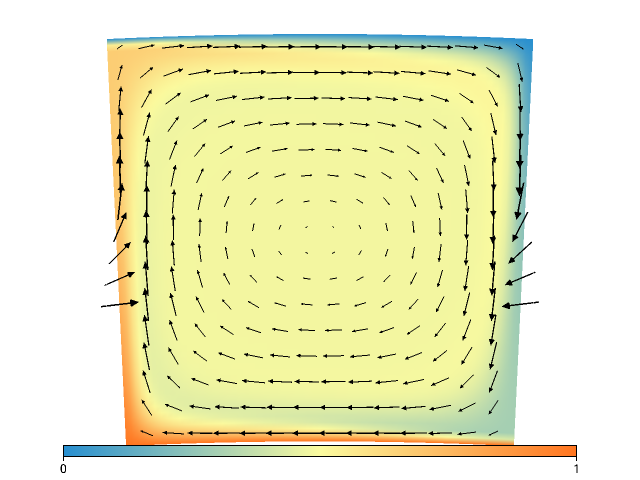

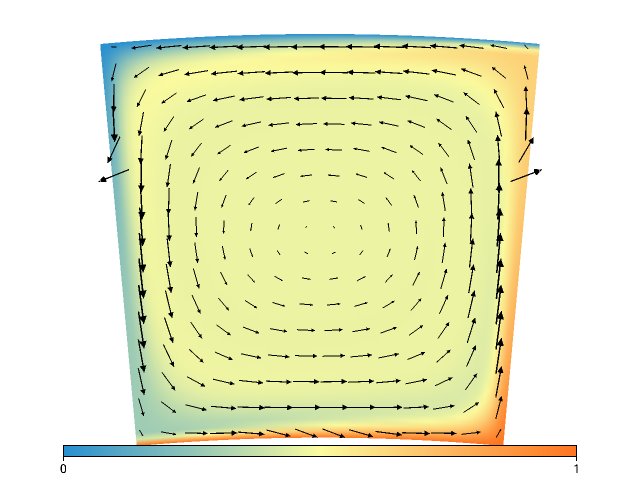

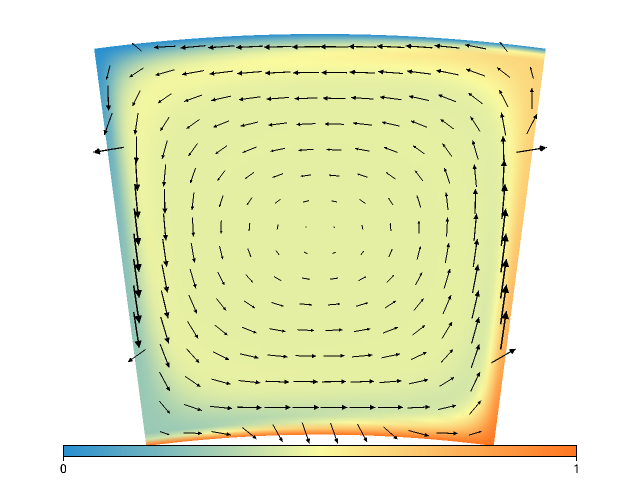

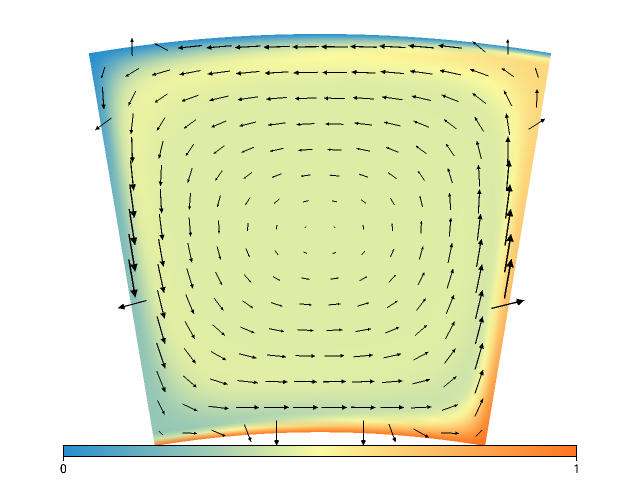

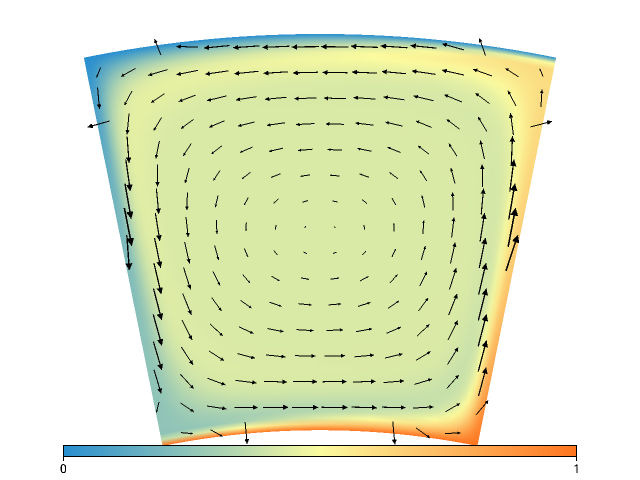

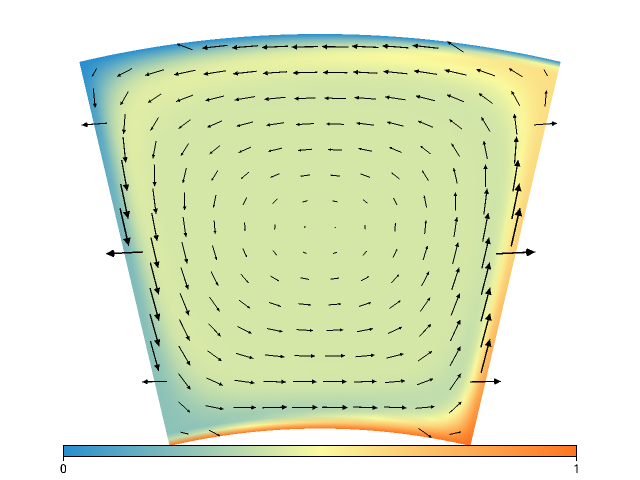

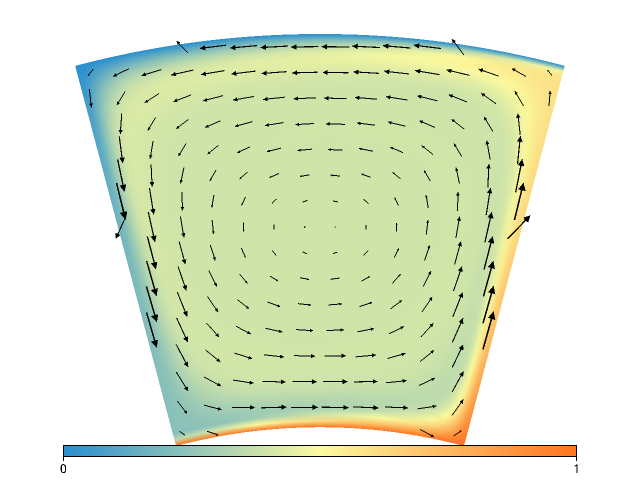

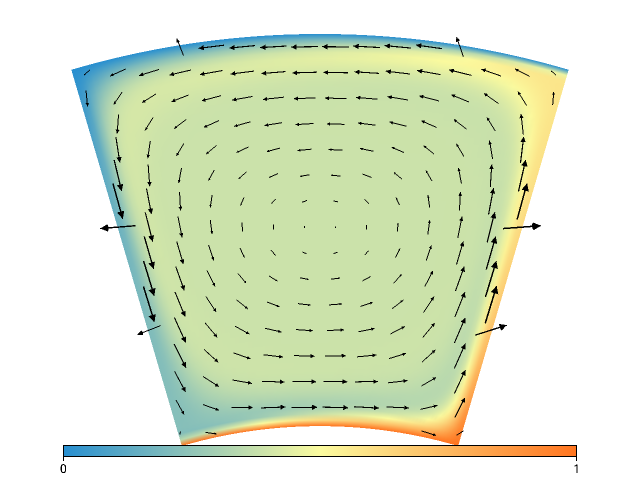

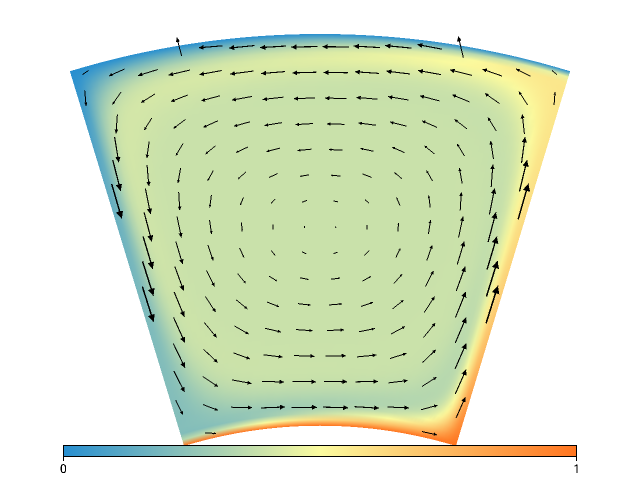

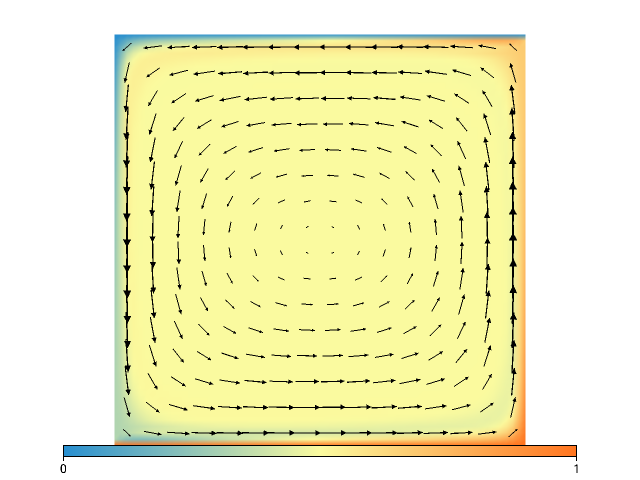

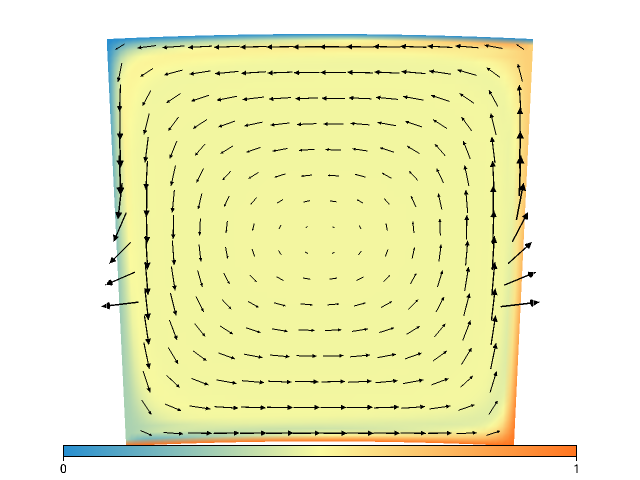

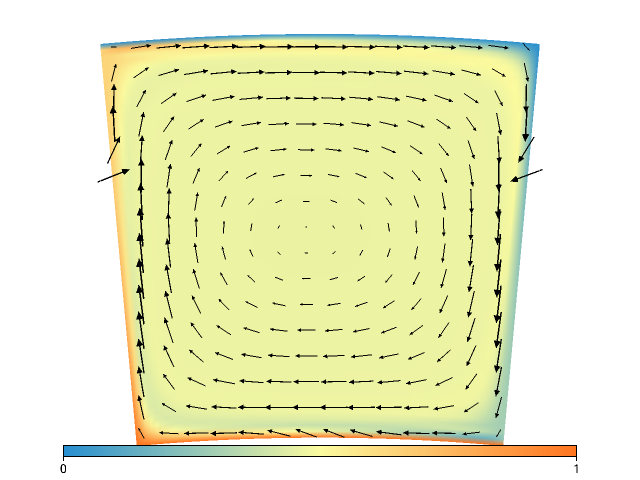

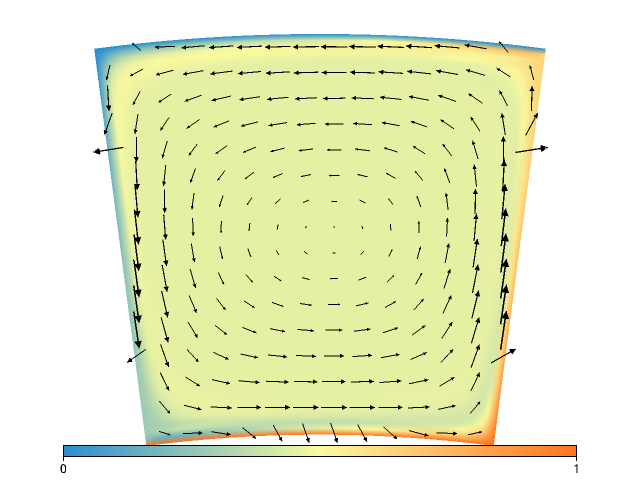

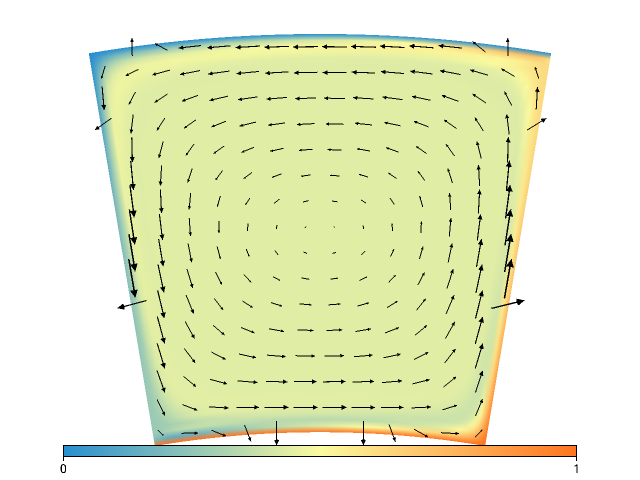

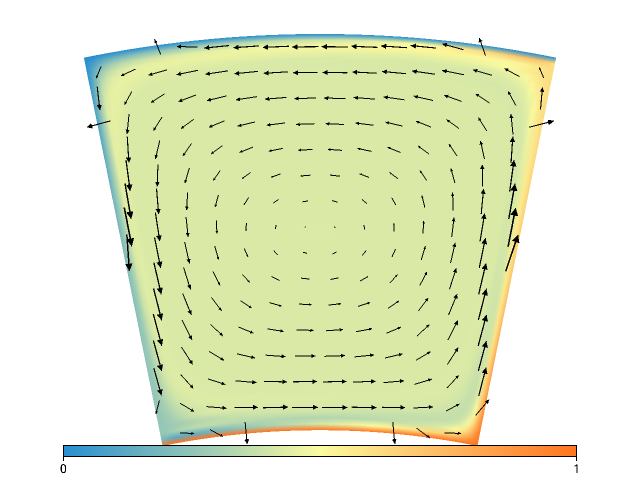

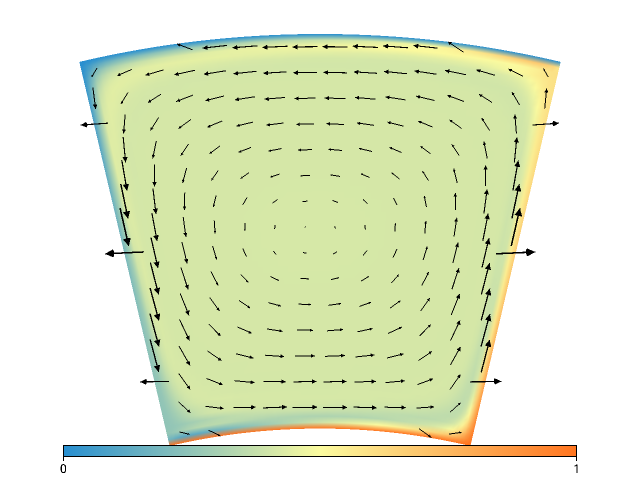

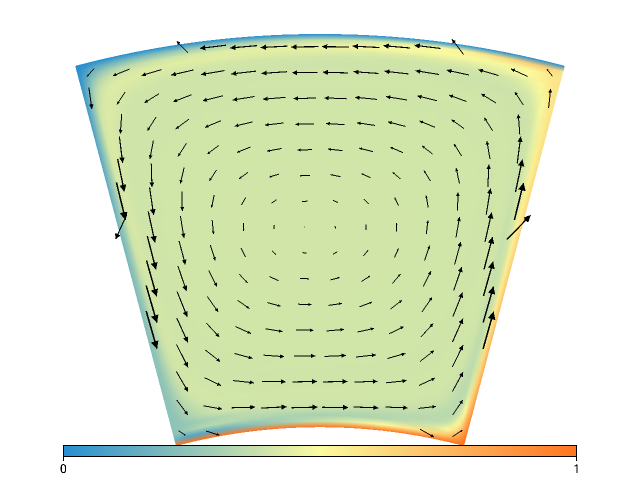

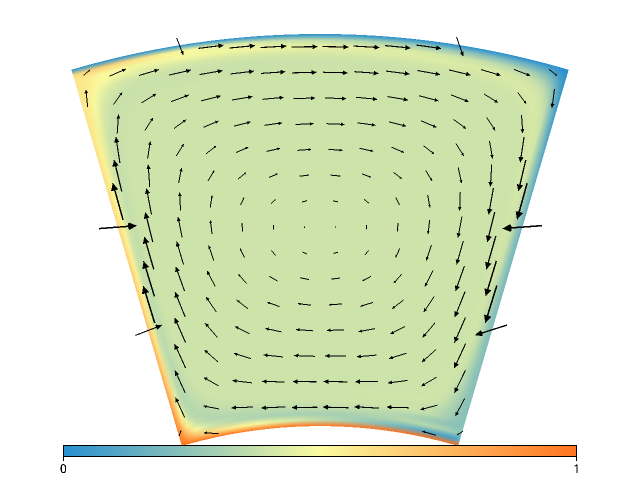

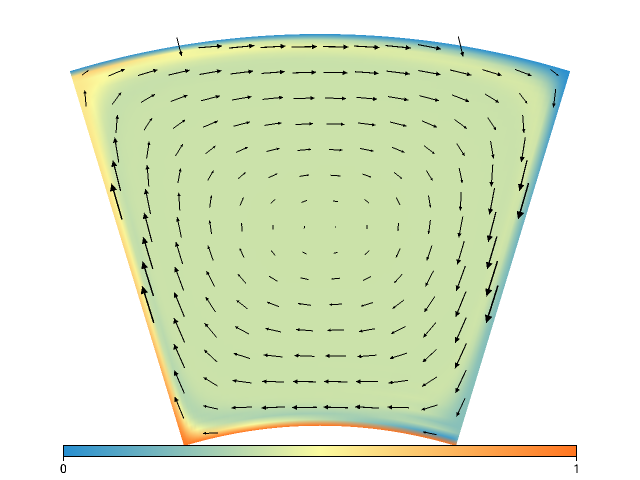

In [7]:
for directory in directoryList:
    display(Image(filename = (str(directory/'00100000'/'fig.png'))))

In [8]:
outputFrame.loc[outputFrame['modeltime'] > 0.1]

avTemp  avVisc  modeltime         Nu      step  \
testsuite000 442    0.499981     1.0   0.100154  10.259585    4420.0   
             443    0.499981     1.0   0.100370  10.259576    4430.0   
             444    0.499981     1.0   0.100585  10.259568    4440.0   
             445    0.499980     1.0   0.100800  10.259562    4450.0   
             446    0.499980     1.0   0.101016  10.259556    4460.0   
             447    0.499980     1.0   0.101231  10.259552    4470.0   
             448    0.499980     1.0   0.101446  10.259550    4480.0   
             449    0.499980     1.0   0.101662  10.259548    4490.0   
             450    0.499980     1.0   0.101877  10.259547    4500.0   
             451    0.499980     1.0   0.102092  10.259547    4510.0   
             452    0.499980     1.0   0.102307  10.259547    4520.0   
             453    0.499980     1.0   0.102523  10.259547    4530.0   
             454    0.499980     1.0   0.102738  10.259546    4540.0   
             455    0.499980     1.0   0.102953  10.259545    4550.0   
             456    0.499980     1.0   0.103169  10.259543    4560.0   
             457    0.499980     1.0   0.103384  10.259540    4570.0   
             458    0.499980     1.0   0.103599  10.259537    4580.0   
             459    0.499980     1.0   0.103815  10.259534    4590.0   
             460    0.499980     1.0   0.104030  10.259531    4600.0   
             461    0.499980     1.0   0.104245  10.259529    4610.0   
             462    0.499980     1.0   0.104460  10.259527    4620.0   
             463    0.499980     1.0   0.104676  10.259526    4630.0   
             464    0.499980     1.0   0.104891  10.259526    4640.0   
             465    0.499980     1.0   0.105106  10.259527    4650.0   
             466    0.499980     1.0   0.105322  10.259529    4660.0   
             467    0.499980     1.0   0.105537  10.259531    4670.0   
             468    0.499980     1.0   0.105752  10.259534    4680.0   
             469    0.499980     1.0   0.105968  10.259537    4690.0   
             470    0.499980     1.0   0.106183  10.259540    4700.0   
             471    0.499980     1.0   0.106398  10.259543    4710.0   
...                      ...     ...        ...        ...       ...   
testsuite020 9971   0.499797     1.0   0.102550  31.744485   99710.0   
             9972   0.499797     1.0   0.102560  31.744476   99720.0   
             9973   0.499797     1.0   0.102570  31.744468   99730.0   
             9974   0.499797     1.0   0.102580  31.744459   99740.0   
             9975   0.499797     1.0   0.102591  31.744450   99750.0   
             9976   0.499797     1.0   0.102601  31.744441   99760.0   
             9977   0.499797     1.0   0.102611  31.744433   99770.0   
             9978   0.499798     1.0   0.102621  31.744424   99780.0   
             9979   0.499798     1.0   0.102631  31.744415   99790.0   
             9980   0.499798     1.0   0.102641  31.744406   99800.0   
             9981   0.499798     1.0   0.102651  31.744398   99810.0   
             9982   0.499798     1.0   0.102661  31.744389   99820.0   
             9983   0.499798     1.0   0.102672  31.744380   99830.0   
             9984   0.499798     1.0   0.102682  31.744372   99840.0   
             9985   0.499799     1.0   0.102692  31.744363   99850.0   
             9986   0.499799     1.0   0.102702  31.744354   99860.0   
             9987   0.499799     1.0   0.102712  31.744346   99870.0   
             9988   0.499799     1.0   0.102722  31.744337   99880.0   
             9989   0.499799     1.0   0.102732  31.744328   99890.0   
             9990   0.499799     1.0   0.102742  31.744320   99900.0   
             9991   0.499800     1.0   0.102753  31.744311   99910.0   
             9992   0.499800     1.0   0.102763  31.744302   99920.0   
             9993   0.499800     1.0   0.102773  31.744294   99930.0   
             9994   0.499800     1.0   0.102783  31.744285   9

In [9]:
allwaDict = {}
for index in indices:
    waDict = {}
    frame = outputFrame.loc[index]
    tIntervals = frame['modeltime'].diff()
    for item in frame.columns.values:
        if not item == 'modeltime':
            waDict[item + '_tAv'] = np.average(frame[item][1:], weights = tIntervals[1:])
    allwaDict[index] = waDict
reductionFrame = pd.DataFrame(allwaDict).transpose()

In [10]:
superFrame = pd.concat([inputFrame.loc[indices], reductionFrame], axis = 1)

In [11]:
superFrame

,Ra,aspect,isoviscous,maxVisc,ratio,res,tau0,tau1,Nu_tAv,VRMS_tAv,avTemp_tAv,avVisc_tAv,step_tAv,surfVRMS_tAv,yielding_tAv
testsuite000,100000.0,1.0,True,30000.0,1.0001,64,400000.0,10000000.0,10.239457,189.544466,0.499980,1.0,49890.624518,211.671107,1.0
testsuite001,100000.0,1.0,True,30000.0,1.1000,64,400000.0,10000000.0,10.740692,189.349981,0.480982,1.0,49883.435673,208.649319,1.0
testsuite002,100000.0,1.0,True,30000.0,1.2000,64,400000.0,10000000.0,11.198600,188.967127,0.463711,1.0,49868.807682,205.625070,1.0
testsuite003,100000.0,1.0,True,30000.0,1.3000,64,400000.0,10000000.0,11.617313,188.370164,0.447963,1.0,49853.864553,202.662710,1.0
testsuite004,100000.0,1.0,True,30000.0,1.4000,64,400000.0,10000000.0,12.000555,187.563400,0.433495,1.0,49846.754355,199.819615,1.0
testsuite005,100000.0,1.0,True,30000.0,1.5000,64,400000.0,10000000.0,12.355235,186.693441,0.420215,1.0,49830.657851,197.023766,1.0
testsuite006,100000.0,1.0,True,30000.0,1.6000,64,400000.0,10000000.0,12.682367,185.696843,0.407901,1.0,49823.088172,194.365683,1.0
testsuite007,100000.0,1.0,True,30000.0,1.7000,64,400000.0,10000000.0,12.988040,184.676350,0.396545,1.0,49806.174410,191.758023,1.0
testsuite008,100000.0,1.0,True,30000.0,1.8000,64,400000.0,10000000.0,13.271798,183.581594,0.385928,1.0,49798.628720,189.291356,1.0
testsuite009,100000.0,1.0,True,30000.0,1.8400,64,400000.0,10000000.0,13.380092,183.135673,0.381884,1.0,49795.762574,188.330929,1.0
